In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
data = pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")

# Hotel Bookings Analysis

The aim is to create a  variety of models that predicts the cancellation and compare them in order to see which one would work the best.Ultimately we want to pick the most efficient model.
### 1. Preprocessing
- Handle missing values.
- Prepare and transform the data if needed for the machine learning models.
- Create a few more columns, namely:
family - 1 if the booking is from a family and 0 otherwise
n_people - total number of people the booking is for
n_nights - total number of nights the booking is for


### 2. Exploratory Data Analysis

Questions for our EDA(exploratory data analysis)
1. Whats the most popular month for bookings for both resort hotel and and city hotel
2. Which are the major sources booking those 2 hotels.
3. Are there any major differences in lead time for both hotels.
4. Whats the ADR behaviour across different months
5. Whats the proportion between booked and cancelled(what's the cancellation rate for both hotels)
6. Whats the trend across multiple years.
7. Is there a link between number of adults and hotel booked
8. Are customers prefering to start their holiday during the weekend or weekday
9. Are cancellation spiking in a particular month or year


### 3. Models and comparison

- Logistic Regression
- Naive Bayes Classifier
- Support Vector Classification
- Random Forest
- K nearest neighbour

## Imports


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#LabelEncoder for transforming the categorical data.
from sklearn.preprocessing import LabelEncoder

#Train test split
from sklearn.model_selection import train_test_split
#Confusion matrix and ROC/AUC for comparing the models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

 # Preprocessing

Shape of our DataFrame:

In [4]:
#Checking whats the shape of our data
data.shape

(119390, 32)

Checking the general info of our data:

In [5]:
#Checking the general info of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Checking if we have missing data in the dataframe

In [6]:
# Checking if we have missing data in the dataframe
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

[](http://)Seems like we have 4 problematic columns with missing data, namely:country,agent,company,children.
We have a few options in order to tackle the incomplete data.
1. We can replace the missing entries with the most common occurances (the mode) in that particular column.
2. We can delete the missing data from the dataframe.

### Decision about missing data
We can take a mixed approach: We will drop the company and agent columns from the data frame as we have way too many missing entries there.

We can add the missing 488 country entries with the most frequest occurent country(mode).It would be reasonable to just drop these entries too as we have sufficiently large dataset.

Similarly we will add the 4 missing children entries with the mean of the column.


In [7]:
#Dropping agent and company columns and filling missing data for children and country with the mode of those columns
data=data.drop(['agent','company'],axis=1)
data.country=data.country.fillna(data.country.mode()[0])
data.children=data.children.fillna(data.children.mean())

Now we have fixed our missing data and we no longer have empty rows:

In [8]:
#Checking if we have more missing data:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Checking how is our data looking:

In [9]:
#Getting a grasp of what the data contains and start planning what questions we want to answer in our exploratory data analysis
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


seeing all the categorical unique values for our categorical columns

In [10]:
# Finding out the unique values for the categorical variable in the dataset:
print('Unique values for hotel:\n', data.hotel.unique())
print('Unique values for arrival_date_month:\n', data.arrival_date_month.unique())
print('Unique values for customer_type:\n', data.customer_type.unique())
print('Unique values for reservation_status:\n', data.reservation_status.unique())
print('Unique values for deposit_type:\n',data.deposit_type.unique())
print('Unique values for reserved_room_type :\n',data.reserved_room_type .unique())
print('Unique values for assigned_room_type :\n',data.assigned_room_type .unique())
print('Unique values for distribution_channel :\n',data.distribution_channel .unique())
print('Unique values for market_segment :\n',data.market_segment.unique())
print('Unique values for meal :\n',data.meal.unique())

Unique values for hotel:
 ['Resort Hotel' 'City Hotel']
Unique values for arrival_date_month:
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Unique values for customer_type:
 ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values for reservation_status:
 ['Check-Out' 'Canceled' 'No-Show']
Unique values for deposit_type:
 ['No Deposit' 'Refundable' 'Non Refund']
Unique values for reserved_room_type :
 ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values for assigned_room_type :
 ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values for distribution_channel :
 ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values for market_segment :
 ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values for meal :
 ['BB' 'FB' 'HB' 'SC' 'Undefined']


Transforming arrival date month names to numbers 1-12 for easier use and visualisation. Also transforming hotels to Resort Hotel:0 ,City Hotel:1

In [11]:
# Transforming arrival date month names to numbers 1-12 for easier use and visualisation
# I did this manually originally and then I saw 

data.arrival_date_month=data.arrival_date_month.map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})

# transforming resort hotel and city hotel to 0 and 1 for easier use

data.hotel=data.hotel.map({'Resort Hotel':0 ,'City Hotel':1})

In [12]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,0,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,13,2015,7,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


We are adding a few more columns that we will later check if they are relevant for our machine learning training.

The ones will be created are :
1. family - if the booking is made by a family then 1(if the booking includes adults and babies and children), else 0
2. n_people - that is the total number of adults babies and children
3. n_nights - thats the total number of nights the customers booked (weekend nights + week nights)

In [13]:
#creating a column that defines whether the customers are family or not using the adults/children/babies columns
def family(data):
    if (data.adults>0 and data.babies>0 and data.children>0):
        val=1
    else:
        val=0
    return val
data['family']=data.apply(family,axis=1)

In [14]:
#creating a column that calculates the tot number of people booking:
data['n_people']=data.adults + data.babies + data.children

#creating a column that includes the total number of nights the customer booked for:
data['n_nights']=data['stays_in_weekend_nights']+data['stays_in_week_nights']

# EDA

#### Findings:
* We can see that the city hotel has bigger volume than the resort hotel. 
* Appart from that given the fact that the dataset is for Portugal we can see that there is seasonality in summer (volume peaks in summer).
* Customers tend to be more likely to cancel the city hotel than the resort hotel on average.

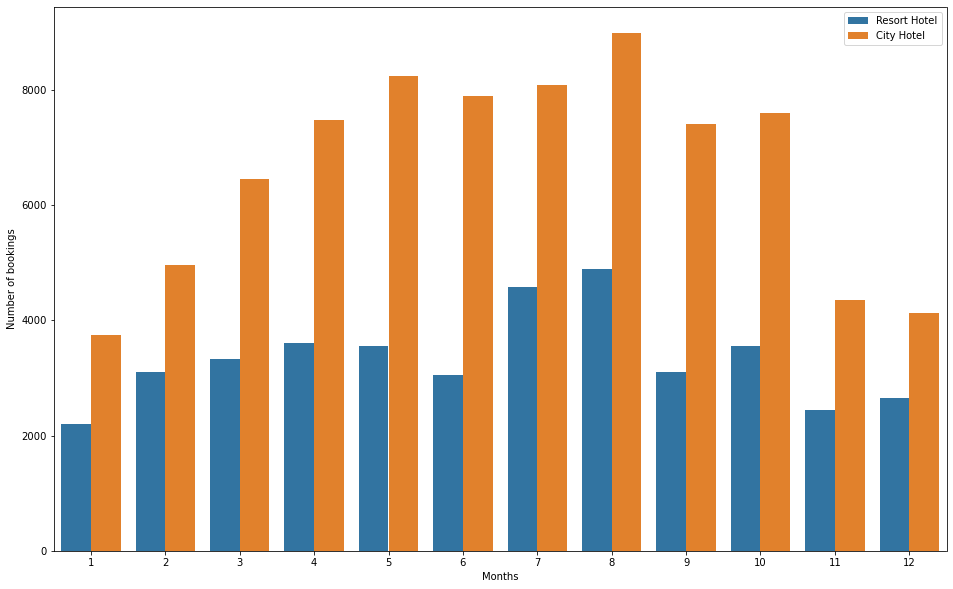

In [15]:
# 1. Whats the most popular month for bookings for both resort hotel and and city hotel
plt.figure(figsize=(16,10))
legend_data={'Resort Hotel':0 ,'City Hotel':1}
ax=sns.countplot(x='arrival_date_month',data=data,hue='hotel')
ax.set(xlabel='Months',ylabel='Number of bookings')
ax.legend(legend_data)
plt.show()

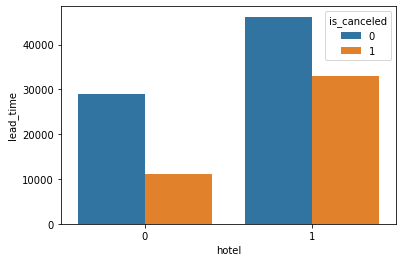

In [16]:
#How does cancellation looks like for both hotels.

ax=sns.barplot(x='hotel',y='lead_time',hue='is_canceled', data=data.groupby(["hotel","is_canceled"]).lead_time.count().reset_index())
#ax.legend(legend_data)
plt.show()


A quick pivot method below to see if there is a significant difference in the means of some of the parameters for the canceled bookings vs the non-canceled bookings.
* Firstly we can see again that cancellations tend to occur more frequently in the city breaks than the resort hotels(in the hotel column we can see that in the cancelled row the mean is 0.748 which means that cancellations are favoured towards the 1(city hotel rather than the 0(resort))
* People who book much in advance tend to cancel their bookings more often (144.8 vs 79.98) which makes sense as short lead time bookings leave less time for the customers to change their mind.
* Both arrival date months means are around 6.5-6.6 which means that somewhere between june and july volume for both peaks. Those numbers being so close together indicates that there wont be big correlation between which month customer books and cancellation though
* There is no signigicant difference between weekdays and weekends which means that there shouldnt be a strong correlation between which days of the week the customers are booking and cancellation
* The customers who have cancelled before are much more likely to cancel again.
* The customers who amend their bookings more often tend to cancel much less.
* The more customers are in the waiting list the more likely they will cancel.
* Cheaper bookings get cancelled less on average than more expensive bookings.
* The more special requests customers have the less likely they will cancel their booking.
* There is no immediate inference we can make about the new metrics we created and cancellation (family,n_people,n_nights)

In [17]:
data.groupby(["is_canceled"]).mean().reset_index()

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,family,n_people,n_nights
0,0,0.615012,79.984687,2016.147514,6.526355,27.080143,15.839529,0.928971,2.464053,1.829737,...,0.015792,0.202977,0.293364,1.589868,99.987693,0.0993,0.714060,0.001849,1.942461,3.393023
1,1,0.748508,144.848815,2016.171920,6.596893,27.309696,15.728066,0.925267,2.561912,1.901728,...,0.208348,0.025122,0.098340,3.564083,104.964333,0.0000,0.328826,0.000746,2.012062,3.487179


#### Country data inference:
*Biggest source is domestic with other major EU sources following.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


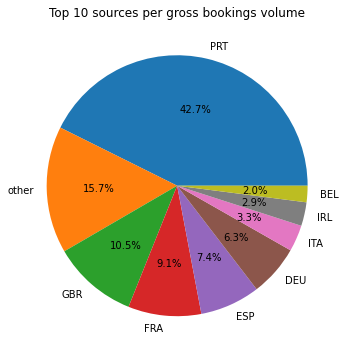

In [18]:
country_data=data.country.value_counts()
# Adding the bookings for all countries outside of top 10 and naming that row other.
other_vals=pd.DataFrame({0:country_data[10:].sum()},index=['other'])
#Adding that new row to our data
country_data=country_data.append(other_vals)
# Sorting the country data in descending order
country_data=country_data.sort_values(by=[0],ascending=False)


# Creating the pie chart and displaying only the top 10 sources
plt.figure(figsize=(10,6))
plt.title('Top 10 sources per gross bookings volume')
fig=plt.pie(country_data[0:9],labels=country_data.index[0:9],autopct='%1.1f%%')
plt.show()


In [19]:
#Are there any major differences in lead time for both hotels.

data[['hotel','lead_time']].groupby(["hotel"]).mean().reset_index()

,hotel,lead_time
0,0,92.675686
1,1,109.735724


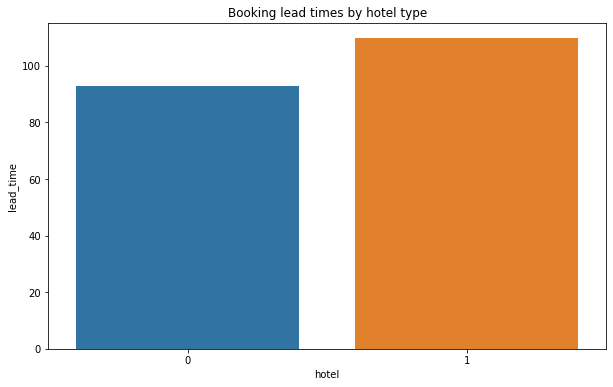

In [20]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='hotel',y='lead_time', data=data[['hotel','lead_time']].groupby(["hotel"]).mean().reset_index())
#ax.legend(legend_data)
plt.title('Booking lead times by hotel type')
plt.show()

#### Pivoting the data in order to try and spot some trends in lead time over the years.
* We can see that we have increasing lead time trend YOY thats consistent across all years in the dataset

In [21]:
#Whats the ADR behaviour across different months
data_line_plot=data[['arrival_date_year','arrival_date_month','lead_time']].groupby(['arrival_date_year',"arrival_date_month"]).mean().reset_index()
data_line_plot

,arrival_date_year,arrival_date_month,lead_time
0,2015,7,125.967939
1,2015,8,99.392389
2,2015,9,123.138248
3,2015,10,102.393988
4,2015,11,48.091880
5,2015,12,52.386301
6,2016,1,32.523132
7,2016,2,38.841172
8,2016,3,57.326078
9,2016,4,85.847273


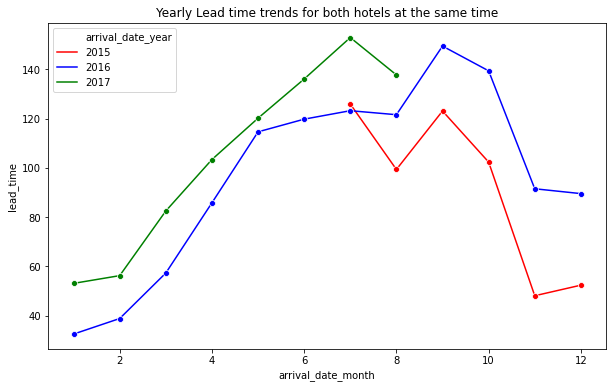

In [22]:
#plotting a graph with lead time per year for all the data.
plt.figure(figsize=(10,6))
plt.title('Yearly Lead time trends for both hotels at the same time')
sns.lineplot(x='arrival_date_month',y='lead_time',data=data_line_plot,hue='arrival_date_year',marker='o',palette=['red','blue','green'])
plt.show()

Whats the proportion between booked and cancelled(what's the cancellation rate for both hotels)
* Cancelation rate for resort hotel :28%
* Cancelation rate for city hotel: 42%

In [23]:
#Whats the proportion between booked and cancelled(what's the cancellation rate for both hotels)
lineplot2=data[['is_canceled','hotel','lead_time']].groupby(['is_canceled','hotel']).count().reset_index()
lineplot2

,is_canceled,hotel,lead_time
0,0,0,28938
1,0,1,46228
2,1,0,11122
3,1,1,33102


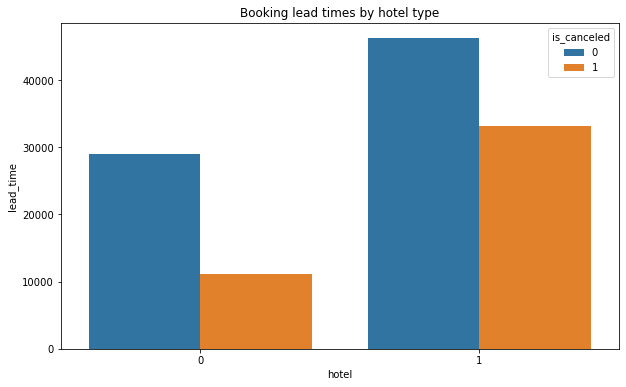

In [24]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='hotel',y='lead_time', data=lineplot2,hue='is_canceled')
#ax.legend(['Resort hotel is 0','City hotel is 1'])
plt.title('Booking lead times by hotel type')
plt.show()

In [25]:
# Calculating the cancelation rate for both hotels:
print('Calcelation rate for resort hotel:',round(lineplot2['lead_time'][2]/(lineplot2['lead_time'][0]+lineplot2['lead_time'][2]),2))
print('Calcelation rate for city hotel:',round(lineplot2['lead_time'][3]/(lineplot2['lead_time'][1]+lineplot2['lead_time'][3]),2))

Calcelation rate for resort hotel: 0.28
Calcelation rate for city hotel: 0.42


There is no big difference between number of people that have booked the hotel and cancelation which means that we shouldnt expect strong correlation between number of people and cancellation

In [26]:
#Is there a link between number of guests and hotel booked
#Pivoting the number of hotels and seeing what the mean of n_people is:
data[['hotel','n_people']].groupby(['hotel']).mean().reset_index()

,hotel,n_people
0,0,2.009735
1,1,1.947289


Cancellations for city hotel are consistently higher than the cancellations for the resort:

In [27]:
#Are cancellation spiking in a particular month or year
data_line_plot=data[['arrival_date_year','arrival_date_month','is_canceled','hotel']].groupby(['arrival_date_year',"arrival_date_month",'hotel']).mean().reset_index()
data_line_plot

,arrival_date_year,arrival_date_month,hotel,is_canceled
0,2015,7,0,0.232221
1,2015,7,1,0.671674
2,2015,8,0,0.259759
3,2015,8,1,0.496774
4,2015,9,0,0.347634
5,2015,9,1,0.437234
6,2015,10,0,0.261617
7,2015,10,1,0.390136
8,2015,11,0,0.167421
9,2015,11,1,0.243725


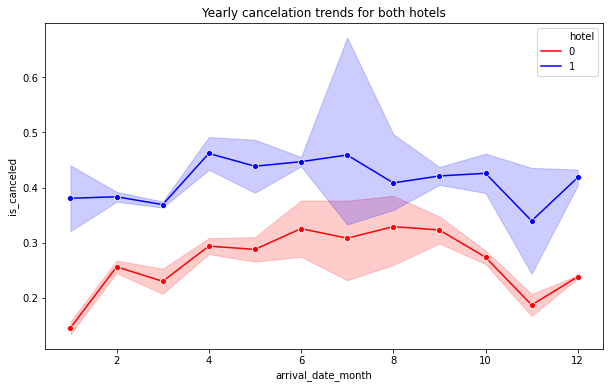

In [28]:
#plotting a graph with lead time per year for all the data.
plt.figure(figsize=(10,6))
plt.title('Yearly cancelation trends for both hotels')
sns.lineplot(x='arrival_date_month',y='is_canceled',data=data_line_plot,hue='hotel',marker='o',palette=['red','blue'])
plt.show()

# Label encoding the categorical columns 

In this section we are transforming the categorical data into numerical in order to run a correlation analysis and find which features are relevant for our machine learning model.

In [29]:
# Calling the LabelEncoder. Also I am duplicating data into data1 where I will encode all the categorical values.
# After that I will see the correlations of all the variables and particularly the correllation with is_cancelled.
#That way if some of the variables have very low correlation I can safely drop from the models.
le = LabelEncoder()
data1=data
data1.customer_type=le.fit_transform(data1.customer_type)
# changing the country strings to numerical data
data1.country=le.fit_transform(data1.country)
#Transforming all the data to numerical values so that we can use those variables for correlation analysis and the model building
data1.deposit_type=le.fit_transform(data1.deposit_type)
data1.reserved_room_type=le.fit_transform(data1.reserved_room_type)
data1.assigned_room_type=le.fit_transform(data1.assigned_room_type)
data1.distribution_channel=le.fit_transform(data1.distribution_channel)
data1.market_segment=le.fit_transform(data1.market_segment)
data1.meal=le.fit_transform(data1.meal)

# Running correlation analysis to determine which variables are significant for our analysis.

In [30]:
data1.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,family,n_people,n_nights
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,-0.013183,...,-0.072820,0.159021,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.021180,-0.040817,-0.247479
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,0.060017,...,-0.144381,0.468634,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.014044,0.046528,0.017779
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.119519,...,0.000149,0.375667,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.012242,0.072260,0.157167
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.029635,...,0.030872,-0.064714,-0.056497,-0.006149,0.197580,-0.013684,0.108531,0.000959,0.052119,0.031438
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,0.028534,...,0.004809,0.004048,0.019045,-0.029753,0.079315,0.000257,0.028026,0.001713,0.027254,0.021536
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,0.025909,...,0.005508,0.003891,0.022933,-0.028432,0.075791,0.001920,0.026149,0.001600,0.025222,0.018719
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.001566,...,0.010613,-0.001358,0.022728,0.012188,0.030245,0.008683,0.003062,-0.000837,0.006737,-0.027408
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.091871,...,0.063281,-0.111435,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.004302,0.101425,0.762790
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.092976,...,0.096209,-0.076788,-0.002020,-0.127223,0.065237,-0.024859,0.068192,0.009252,0.101664,0.941005
adults,-0.013183,0.060017,0.119519,0.029635,0.028534,0.025909,-0.001566,0.091871,0.092976,1.000000,...,-0.051673,-0.027644,-0.008283,-0.101756,0.230641,0.014785,0.122884,0.008654,0.821106,0.105249


#### From the chart below we can make a few decisions:
1. Drop arrival_date_week_number, stays_in_weekend_nights and arrival_date_day_of_month since their importances are really low while predicting cancellations.
2.  Also we need to drop babies and children and we have used them to create the n_people column.
3. We need to drop reservation_status as we have data there about which data is cancelled and which not, so we cannot use that as a X variable.
4. Adults has better explanation power than total number of people so drop that column that we previously created.
5. Drop n_nights ad the week_nights column has better explanaion power.

In [31]:
#Determining how how are all x values correlated to is_canceled
data1.corr()['is_canceled']

hotel                             0.136531
is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_month                0.011022
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
meal                             -0.017678
country                           0.267502
market_segment                    0.059338
distribution_channel              0.167600
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
assigned_room_type               -0.176028
booking_changes                  -0.144381
deposit_type                      0.468634
days_in_wai

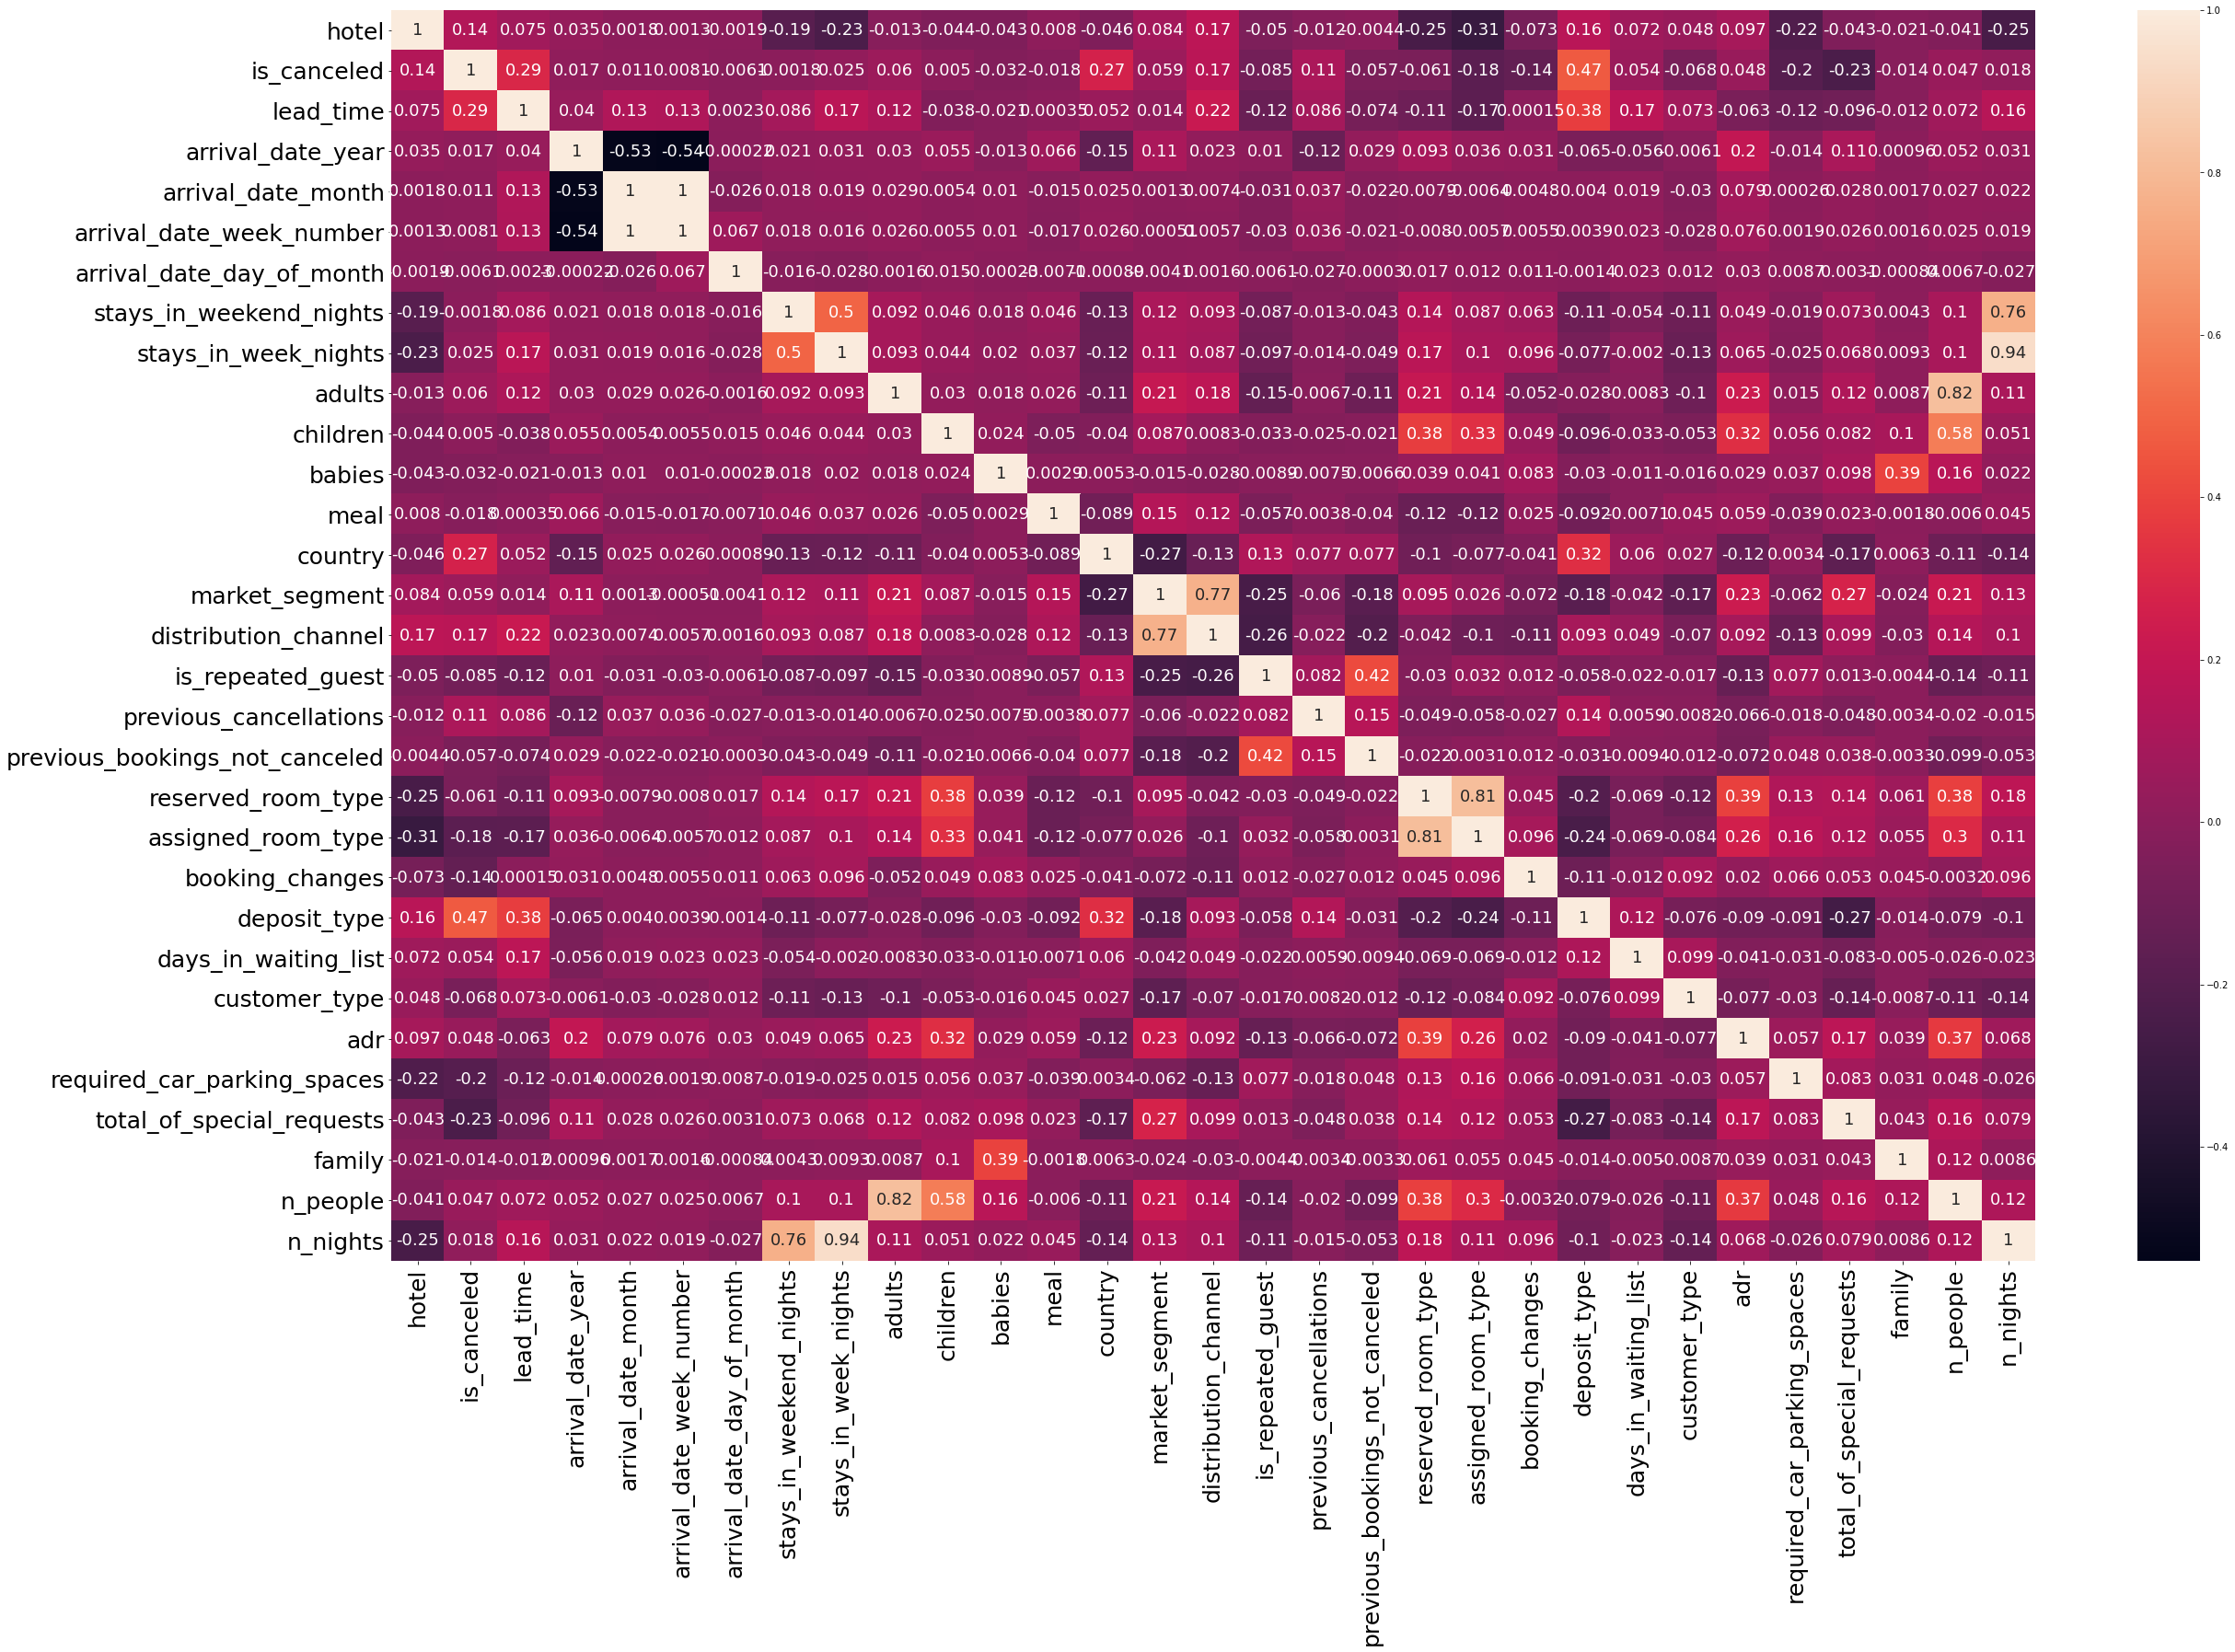

In [32]:
#Correlation heatmap
plt.figure(figsize=(40,25))
sns.heatmap(data1.corr(),annot=True,annot_kws={'size':18})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [33]:
#droping all the abovementioned columns
data1=data1.drop(['reservation_status','stays_in_weekend_nights','arrival_date_week_number','stays_in_weekend_nights','arrival_date_day_of_month','meal','babies','children','n_people'],axis=1)
data1=data1.drop(['n_nights'],axis=1)
data1=data1.drop(['reservation_status_date'],axis=1)


Final visual check to see if our Label Encoder worked as intended:

In [34]:
data1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,country,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,family
0,0,0,342,2015,7,0,2,135,3,1,...,2,2,3,0,0,2,0.0,0,0,0
1,0,0,737,2015,7,0,2,135,3,1,...,2,2,4,0,0,2,0.0,0,0,0
2,0,0,7,2015,7,1,1,59,3,1,...,0,2,0,0,0,2,75.0,0,0,0
3,0,0,13,2015,7,1,1,59,2,0,...,0,0,0,0,0,2,75.0,0,0,0
4,0,0,14,2015,7,2,2,59,6,3,...,0,0,0,0,0,2,98.0,0,1,0


### To prep the data for model building we need to:
1. move the is_canceled column in a var named y
2. drop the is_canceled column from data1 and name it x
3. split our data into train/test data.

In [35]:
# Firstly move the is canceled column to y as thats what we want to predict
y=data1['is_canceled']

#Then drop the is_canceled column from our features.
x=data1.drop(['is_canceled'],axis=1)

# Create the test/train split for our models. I have arbitrary chosen 80-20 split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Model training and testing.
Now we are ready to train our model and predict which customer will cancel their booking. There are many predictive algorithms to choose from. As this problem is a classification and regression problem I will choose:
1. Logistic Regression
2. Naive Bayes Classifier
3. SVC(Support Vector Classification)
4. Random Forest
5. KNN or k-Nearest Neighbors

I will then do 3 metrics:
* Calculate the score of each model
* Calculate the confusion matrix of each model
* Calculate the ROC/AUC for each model.

#### Finally, I will combine the scoreas and AUC for each model and see which model performed best. The goal is too choose the model with the highest score/AUC.


## Logistic Regression calculations

In [36]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y.prob=logreg.decision_function(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
print('Score:',acc_log)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 77.22
Confusion matrix:
 [[13054  2037]
 [ 3403  5384]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
#Creating roc and aoc for logreg
logreg_fpr,logreg_tpr,threshold=roc_curve(y_test,y_pred)
auc_logreg=auc(logreg_fpr,logreg_tpr)

## Naive Bayes Classifier calculations

In [38]:
#Naive bayes classifier
nbc = GaussianNB()
nbc.fit(x_train, y_train)
y_pred = nbc.predict(x_test)
acc_nbc = round(nbc.score(x_test, y_test) * 100, 2)
print('Score:',acc_nbc)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 57.42
Confusion matrix:
 [[5824 9267]
 [ 901 7886]]


In [39]:
#Creating roc and aoc for GaussianNB
nbc_fpr,nbc_tpr,threshold=roc_curve(y_test,y_pred)
auc_nbc=auc(nbc_fpr,nbc_tpr)

## SVC calculations

In [40]:
#SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
print('Score:',acc_svc)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 72.89
Confusion matrix:
 [[13878  1213]
 [ 5261  3526]]


In [41]:
#Creating roc and aoc for SVC
svc_fpr,svc_tpr,threshold=roc_curve(y_test,y_pred)
auc_svc=auc(svc_fpr,svc_tpr)

## Random Forest calculations

In [42]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc_rf = round(rf.score(x_test, y_test) * 100, 2)
print('Score:',acc_rf)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 88.89
Confusion matrix:
 [[14080  1011]
 [ 1641  7146]]


In [43]:
#Creating roc and aoc for Random Forest
rf_fpr,rf_tpr,threshold=roc_curve(y_test,y_pred)
auc_rf=auc(rf_fpr,rf_tpr)

## K-near neigbours Classifier calculations

In [44]:
#knn neghbours
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print('Score:',acc_knn)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 79.53
Confusion matrix:
 [[12954  2137]
 [ 2750  6037]]


In [45]:
#Creating roc and aoc for knn neighbours
knn_fpr,knn_tpr,threshold=roc_curve(y_test,y_pred)
auc_knn=auc(knn_fpr,knn_tpr)

## Result summary

#### We have put all results into a DataFrame to best see and comapare all 5 machine learning performance.
#### We can see that the random forest model has the best accuracy (almost 89%) with the bes ROC/AUC measure.****

In [46]:
model_names=['Logistic Regression','Naive Bayes Classifier','SVC(Support Vector Classification)','Random Forest','k-Nearest Neighbors']
accuracy=[acc_log,acc_nbc,acc_svc,acc_rf,acc_knn]
auc=[auc_logreg,auc_nbc,auc_svc,auc_rf,auc_knn]
results=pd.DataFrame({'Model':model_names,'Accuracy':accuracy,'AUC':auc})
results

,Model,Accuracy,AUC
0,Logistic Regression,77.22,0.738871
1,Naive Bayes Classifier,57.42,0.641694
2,SVC(Support Vector Classification),72.89,0.660448
3,Random Forest,88.89,0.873127
4,k-Nearest Neighbors,79.53,0.772715


# Visualising the Area under the curve with a line plot
We can clearly see that the random forest perform best among the 5 machine learning models built and it is the furthest away from the diagonal of the graph.

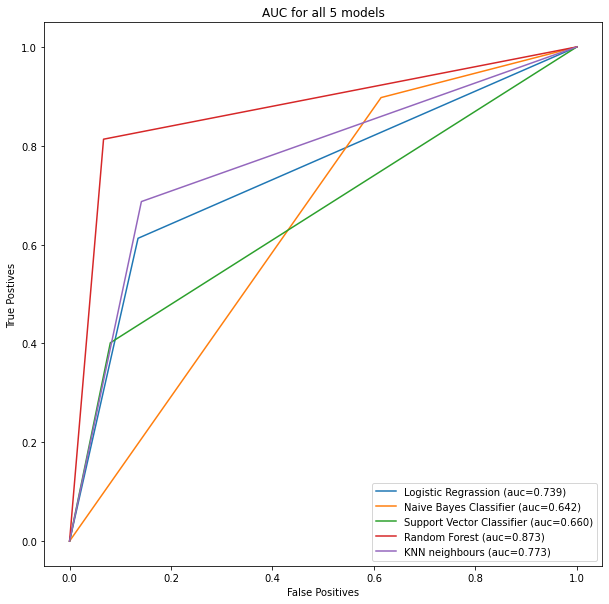

In [47]:
#plotting the AUC curves to visualise that random forest model is the best in this situation
plt.figure(figsize=(10,10))
plt.plot(logreg_fpr,logreg_tpr,label='Logistic Regrassion (auc=%0.3f)' %auc_logreg)
plt.plot(nbc_fpr,nbc_tpr,label='Naive Bayes Classifier (auc=%0.3f)' %auc_nbc)
plt.plot(svc_fpr,svc_tpr, label='Support Vector Classifier (auc=%0.3f)' %auc_svc)
plt.plot(rf_fpr,rf_tpr, label='Random Forest (auc=%0.3f)' %auc_rf)
plt.plot(knn_fpr,knn_tpr, label='KNN neighbours (auc=%0.3f)' %auc_knn)
plt.title('AUC for all 5 models')
plt.xlabel('False Positives')
plt.ylabel('True Postives')
plt.legend(loc=4)
plt.show()

### Thanks for taking the time to read my analysis. If you have questions, do not hesitate to ask!
### I welcome all kind of feedback as I am still learning and trying to improve my data science skills.